In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 300 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [40]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=200,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/200
10/10 [==============================] - 50s 5s/step - loss: 0.3127 - accuracy: 0.8767 - val_loss: 0.9542 - val_accuracy: 0.6897
Epoch 2/200
10/10 [==============================] - 48s 5s/step - loss: 0.3518 - accuracy: 0.8433 - val_loss: 0.5518 - val_accuracy: 0.8103
Epoch 3/200
10/10 [==============================] - 47s 5s/step - loss: 0.3517 - accuracy: 0.8600 - val_loss: 0.5795 - val_accuracy: 0.8276
Epoch 4/200
10/10 [==============================] - 49s 5s/step - loss: 0.3040 - accuracy: 0.8800 - val_loss: 0.5547 - val_accuracy: 0.7931
Epoch 5/200
10/10 [==============================] - 46s 5s/step - loss: 0.2849 - accuracy: 0.9067 - val_loss: 0.6095 - val_accuracy: 0.7759
Epoch 6/200
10/10 [==============================] - 45s 5s/step - loss: 0.3100 - accuracy: 0.8933 - val_loss: 0.7068 - val_accuracy: 0.7241
Epoch 7/200
10/10 [==============================] - 42s 4s/step - loss: 0.2677 - accuracy: 0.9100 - val_loss: 0.7307 - val_accuracy: 0.7069
Epoch 8/200
1

Epoch 59/200
10/10 [==============================] - 30s 3s/step - loss: 0.3766 - accuracy: 0.8533 - val_loss: 0.6546 - val_accuracy: 0.8276
Epoch 60/200
10/10 [==============================] - 29s 3s/step - loss: 0.2474 - accuracy: 0.9033 - val_loss: 0.8019 - val_accuracy: 0.7069
Epoch 61/200
10/10 [==============================] - 30s 3s/step - loss: 0.3195 - accuracy: 0.8667 - val_loss: 0.6102 - val_accuracy: 0.8276
Epoch 62/200
10/10 [==============================] - 29s 3s/step - loss: 0.2181 - accuracy: 0.9267 - val_loss: 1.1014 - val_accuracy: 0.6552
Epoch 63/200
10/10 [==============================] - 30s 3s/step - loss: 0.2341 - accuracy: 0.9000 - val_loss: 0.6466 - val_accuracy: 0.8103
Epoch 64/200
10/10 [==============================] - 31s 3s/step - loss: 0.2103 - accuracy: 0.9067 - val_loss: 0.7117 - val_accuracy: 0.7414
Epoch 65/200
10/10 [==============================] - 31s 3s/step - loss: 0.1874 - accuracy: 0.9400 - val_loss: 0.8342 - val_accuracy: 0.7069
Epoch 

10/10 [==============================] - 43s 4s/step - loss: 0.1698 - accuracy: 0.9433 - val_loss: 0.7036 - val_accuracy: 0.7586
Epoch 117/200
10/10 [==============================] - 43s 4s/step - loss: 0.1736 - accuracy: 0.9433 - val_loss: 0.6988 - val_accuracy: 0.7414
Epoch 118/200
10/10 [==============================] - 43s 4s/step - loss: 0.1566 - accuracy: 0.9400 - val_loss: 0.6410 - val_accuracy: 0.8276
Epoch 119/200
10/10 [==============================] - 43s 4s/step - loss: 0.2957 - accuracy: 0.8867 - val_loss: 0.6242 - val_accuracy: 0.7759
Epoch 120/200
10/10 [==============================] - 43s 4s/step - loss: 0.2340 - accuracy: 0.9000 - val_loss: 0.6019 - val_accuracy: 0.8448
Epoch 121/200
10/10 [==============================] - 43s 4s/step - loss: 0.1912 - accuracy: 0.9267 - val_loss: 0.8957 - val_accuracy: 0.7241
Epoch 122/200
10/10 [==============================] - 43s 4s/step - loss: 0.3233 - accuracy: 0.8633 - val_loss: 0.5713 - val_accuracy: 0.8276
Epoch 123/200

10/10 [==============================] - 28s 3s/step - loss: 0.1188 - accuracy: 0.9633 - val_loss: 0.6280 - val_accuracy: 0.7931
Epoch 174/200
10/10 [==============================] - 28s 3s/step - loss: 0.1220 - accuracy: 0.9700 - val_loss: 0.6502 - val_accuracy: 0.7241
Epoch 175/200
10/10 [==============================] - 29s 3s/step - loss: 0.1056 - accuracy: 0.9700 - val_loss: 0.6535 - val_accuracy: 0.7241
Epoch 176/200
10/10 [==============================] - 29s 3s/step - loss: 0.1033 - accuracy: 0.9733 - val_loss: 0.8313 - val_accuracy: 0.6897
Epoch 177/200
10/10 [==============================] - 28s 3s/step - loss: 0.1072 - accuracy: 0.9733 - val_loss: 0.5803 - val_accuracy: 0.8276
Epoch 178/200
10/10 [==============================] - 29s 3s/step - loss: 0.1384 - accuracy: 0.9367 - val_loss: 1.0628 - val_accuracy: 0.6724
Epoch 179/200
10/10 [==============================] - 28s 3s/step - loss: 0.1334 - accuracy: 0.9433 - val_loss: 0.5689 - val_accuracy: 0.8103
Epoch 180/200

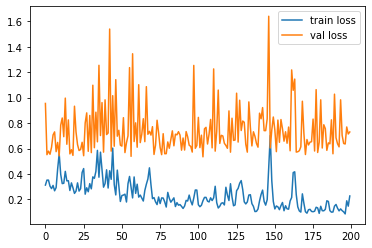

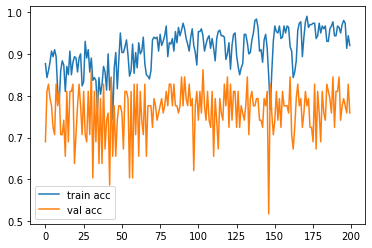

<Figure size 432x288 with 0 Axes>

In [41]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [42]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [43]:
y_pred = model.predict(test_set)

In [44]:
y_pred


array([[1.01504505e-04, 9.99898434e-01, 2.97547646e-11],
       [1.55189065e-02, 9.82843459e-01, 1.63769745e-03],
       [9.01285675e-04, 9.93830621e-01, 5.26823197e-03],
       [1.40240547e-04, 9.99668121e-01, 1.91652100e-04],
       [8.53854835e-01, 1.14824008e-02, 1.34662747e-01],
       [9.67664957e-01, 1.29187265e-06, 3.23338471e-02],
       [6.65471107e-02, 6.38676202e-03, 9.27066147e-01],
       [8.89911171e-05, 9.99841571e-01, 6.93510447e-05],
       [1.21778394e-05, 6.16785526e-01, 3.83202285e-01],
       [2.83962057e-04, 9.99101996e-01, 6.14046934e-04],
       [5.34669280e-01, 4.43714231e-01, 2.16164924e-02],
       [6.81675792e-01, 2.83865988e-01, 3.44582535e-02],
       [7.53762662e-01, 7.59976118e-08, 2.46237263e-01],
       [1.90934062e-03, 9.86386776e-01, 1.17037948e-02],
       [2.02073045e-02, 9.79773283e-01, 1.93332326e-05],
       [2.51765875e-03, 9.97058630e-01, 4.23702353e-04],
       [2.01996434e-02, 3.37831909e-04, 9.79462564e-01],
       [9.99823153e-01, 2.58004

In [45]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [46]:
y_pred


array([1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0,
       0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1], dtype=int64)

In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [48]:
model=load_model('model_resnet50.h5')


In [65]:
img=image.load_img('Datasets/Test/audi/25.jpg',target_size=(224,224))


In [66]:
x=image.img_to_array(img)
x

array([[[138., 159., 144.],
        [140., 156., 146.],
        [143., 154., 148.],
        ...,
        [174., 152., 111.],
        [179., 158., 115.],
        [141., 120.,  75.]],

       [[142., 158., 145.],
        [144., 157., 147.],
        [145., 155., 147.],
        ...,
        [165., 143., 102.],
        [171., 150., 107.],
        [135., 114.,  69.]],

       [[142., 158., 145.],
        [144., 157., 147.],
        [145., 155., 147.],
        ...,
        [165., 143., 102.],
        [171., 150., 107.],
        [135., 114.,  69.]],

       ...,

       [[107., 119., 133.],
        [105., 117., 131.],
        [107., 119., 133.],
        ...,
        [168., 177., 186.],
        [167., 176., 185.],
        [162., 171., 180.]],

       [[107., 119., 133.],
        [105., 117., 131.],
        [107., 119., 133.],
        ...,
        [168., 177., 186.],
        [167., 176., 185.],
        [162., 171., 180.]],

       [[126., 138., 152.],
        [133., 145., 159.],
        [126., 1

In [67]:
x.shape


(224, 224, 3)

In [68]:
x=x/255


In [69]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [70]:
model.predict(img_data)


array([[3.1602542e-14, 7.5593265e-21, 1.0000000e+00]], dtype=float32)

In [71]:
a=np.argmax(model.predict(img_data), axis=1)


In [72]:
a


array([2], dtype=int64)